In [1]:
#liberias
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Carga y Exploración Datos

In [2]:
path='../data/raw/data.csv'
df=pd.read_csv(path)
df

,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno
0,CLI10,F,Si,67,Si,Ingeniero,+20annos,Bajo,3,1957,Generacion X,93442,Segovia,1385,80,1,195,NaN
1,CLI100,M,Si,64,Si,Medico,+20annos,Medio,2,1960,Generacion X,99774,Alicante,1052,50,1,360,5.0
2,CLI1000,M,Si,65,Si,Artista,+20annos,Medio,3,1959,Generacion X,36756,Toledo,1717,30,0,407,3.0
3,CLI10000,M,No,33,No,Funcionario,10-20annos,Bajo,4,1991,Millennials,24616,Leon,1606,30,0,544,4.0
4,CLI10001,M,Si,52,No,Otros,+20annos,Medio,2,1972,Generacion X,29834,LLeida,1346,30,1,170,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,CLI9995,F,Si,76,No,Servicios,+20annos,Alto,2,1948,Generacion X,33389,Toledo,1424,30,1,106,NaN
10802,CLI9996,F,No,44,Si,Funcionario,+20annos,Bajo,1,1980,Generacion X,76067,Cordoba,1514,50,0,257,NaN
10803,CLI9997,M,Si,47,Si,Ejecutivo,+20annos,Alto,3,1977,Generacion X,61300,Lugo,1385,80,1,347,5.0
10804,CLI9998,M,Si,40,Si,Artista,10-20annos,Alto,3,1984,Millennials,106015,Cuenca,1974,30,0,582,1.0


**Vista general**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10806 entries, 0 to 10805
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         10806 non-null  object 
 1   Genero                     10806 non-null  object 
 2   Casado                     10616 non-null  object 
 3   Edad                       10806 non-null  int64  
 4   Graduado                   10703 non-null  object 
 5   Profesion                  10806 non-null  object 
 6   Experiencia_laboral        10806 non-null  object 
 7   Gastoscore                 10806 non-null  object 
 8   Family_Size                10806 non-null  int64  
 9   anno_nacimiento            10806 non-null  int64  
 10  Generacion                 10806 non-null  object 
 11  Ingresos_anuales_brutos    10806 non-null  int64  
 12  Provincia                  10806 non-null  object 
 13  Digital_encuesta           10806 non-null  int

In [4]:
# copia para trabajar pca
df_pca = df.copy()

## Valores Nulos

In [5]:
nulos = df.isnull().sum()
porcentaje_nulos = (nulos / len(df)) * 100
tabla_nulos = pd.DataFrame({
    'Nulos': nulos,
    '% Nulos': porcentaje_nulos.round(1)
})
tabla_nulos[tabla_nulos['Nulos'] > 0]

,Nulos,% Nulos
Casado,190,1.8
Graduado,103,1.0
Campanna_anno,5707,52.8


**Tratamiento de los nulos**
- `Casados` y `Graduados`: los eliminamos porque son únicamente un 2%(pero a futuro).
- `Campanna_años`:  Vamos a sustituir los valores faltantes de 0.

**Casadas y Graduados**

In [6]:
df_pca = df.dropna(subset=['Casado', 'Graduado']).copy()

**Campanna_años**

In [7]:
df_pca['Campanna_anno'] = df['Campanna_anno'].fillna(0)

Comprobamos que se hayan eliminado todos los nulos antes de continuar:

In [8]:
# verificación final
df_pca.isnull().sum()

ID                           0
Genero                       0
Casado                       0
Edad                         0
Graduado                     0
Profesion                    0
Experiencia_laboral          0
Gastoscore                   0
Family_Size                  0
anno_nacimiento              0
Generacion                   0
Ingresos_anuales_brutos      0
Provincia                    0
Digital_encuesta             0
Gasto_medio_mensual_cuota    0
Abandono                     0
Dias_cliente                 0
Campanna_anno                0
dtype: int64

## Tratamiento Variables Numéricas y Categoricas

In [9]:
v_continuas = []
v_categoricas = []
for i in df_pca.columns:
    if df_pca[i].nunique() > 25 or df[i].dtypes in ['float64', 'int64']:
        v_continuas.append(i)
    else:
        v_categoricas.append(i)

print('Variables continuas: {}'.format(', '.join(v_continuas)))
print('Variables categóricas: {}'.format(', '.join(v_categoricas)))

Variables continuas: ID, Edad, Family_Size, anno_nacimiento, Ingresos_anuales_brutos, Provincia, Digital_encuesta, Gasto_medio_mensual_cuota, Abandono, Dias_cliente, Campanna_anno
Variables categóricas: Genero, Casado, Graduado, Profesion, Experiencia_laboral, Gastoscore, Generacion


## Eliminación Columnas

In [10]:
df_pca.drop(columns=['anno_nacimiento'], inplace=True)

In [11]:
df_pca = df_pca.drop(columns=['ID'])

## Categoricas

Para preparar las variables categóricas de cara al análisis (PCA y clustering), se aplicaron diferentes técnicas de codificación en función del tipo de variable:

- **Label Encoding** (0 / 1) para variables binarias:
  - `Genero` (F/M)
  - `Casado` (Sí/No)
  - `Graduado` (Sí/No)

- **One-Hot Encoding** para variables con múltiples categorías sin orden implícito:
  - `Profesion` (tras ser agrupada en sectores macroeconómicos)

- **Ordinal Encoding** para variables con un orden natural:
  - `Experiencia_laboral` (<10 años, 10-20 años, +20 años)
  - `Gastoscore` (Bajo, Medio, Alto)
  - `Generacion` (Generacion Silenciosa, Generacion X, Millennials, Generacion Z)

In [12]:
valores_unicos = {col: df_pca[col].unique().tolist() for col in v_categoricas}
valores_unicos

{'Genero': ['F', 'M'],
 'Casado': ['Si', 'No'],
 'Graduado': ['Si', 'No'],
 'Profesion': ['Ingeniero',
  'Medico',
  'Artista',
  'Funcionario',
  'Otros',
  'Ejecutivo',
  'Construccion',
  'Negocios/empresa',
  'Servicios'],
 'Experiencia_laboral': ['+20annos', '10-20annos', '<10annos'],
 'Gastoscore': ['Bajo', 'Medio', 'Alto'],
 'Generacion': ['Generacion X',
  'Millennials',
  'Generacion Silenciosa',
  'Generacion Z']}

### Label Encoder

**Género/Casado/Graduado**

In [13]:
# Genero
le_genero = LabelEncoder()
df_pca['Genero'] = le_genero.fit_transform(df_pca['Genero'])

# Recordar valores del label
for clase, valor in zip(le_genero.classes_, le_genero.transform(le_genero.classes_)):
    print(f"{clase}: {valor}")

F: 0
M: 1


In [14]:
# Casado
le_casado = LabelEncoder()
df_pca['Casado'] = le_casado.fit_transform(df_pca['Casado'])

print("Codificación de 'Casado':")
for clase, valor in zip(le_casado.classes_, le_casado.transform(le_casado.classes_)):
    print(f"{clase}: {valor}")

Codificación de 'Casado':
No: 0
Si: 1


In [15]:
# Graduado
le_graduado = LabelEncoder()
df_pca['Graduado'] = le_graduado.fit_transform(df_pca['Graduado'])

print("\nCodificación de 'Graduado':")
for clase, valor in zip(le_graduado.classes_, le_graduado.transform(le_graduado.classes_)):
    print(f"{clase}: {valor}")


Codificación de 'Graduado':
No: 0
Si: 1


### One-hot Encoder

**Profesión**

Se agruparon las profesiones en sectores amplios para simplificar el análisis:

- Técnico: Ingeniero, Construcción  
- Salud: Médico  
- Arte: Artista  
- Público/Administrativo: Funcionario, Servicios  
- Empresarial: Ejecutivo, Negocios/empresa  
- Otros: Otros

Esto reduce dimensionalidad sin perder representatividad para el PCA.

In [16]:
conteo_profesiones = df_pca['Profesion'].value_counts()
conteo_profesiones

Profesion
Artista             3295
Funcionario         1713
Otros               1227
Servicios            974
Medico               919
Ingeniero            915
Ejecutivo            761
Negocios/empresa     393
Construccion         321
Name: count, dtype: int64

In [17]:
sectores_profesion = {
    'Tecnico/Ing': ['Ingeniero', 'Construccion'],
    'Salud': ['Medico'],
    'Arte': ['Artista'],
    'Administración/Servicios': ['Funcionario', 'Servicios'],
    'Empresa/Finanzas': ['Ejecutivo', 'Negocios/empresa'],
    'Otros': ['Otros'],
}

mapeo_profesion = {profesion: sector for sector, profesiones in sectores_profesion.items() for profesion in profesiones}
df_pca['Profesion'] = df_pca['Profesion'].map(mapeo_profesion)

**Provincia**

In [18]:
valores_provincia = df_pca['Provincia'].unique().tolist()

# Provincias unicas
print(f"Número de provincias únicas: {len(valores_provincia)}")
print("Provincias:")
for provincia in valores_provincia:
    print("-", provincia)

Número de provincias únicas: 50
Provincias:
- Segovia
- Alicante
- Toledo
- Leon
- LLeida
- Ciudad Real
- ivila
- Guipiºzcoa
- Vizcaya
- Orense
- Castellon
- Pontevedra
- Almeri­a
- Valladolid
- Jaen
- Lugo
- Santa Cruz de Tenerife
- Albacete
- Huelva
- Salamanca
- Ceuta
- Baleares
- Gerona
- Barcelona
- Sevilla
- Guadalajara
- Soria
- Caceres
- Madrid
- Cordoba
- Burgos
- Navarra
- Melilla
- Granada
- Badajoz
- Valencia
- Tarragona
- La Corui±a
- Las Palmas
- Murcia
- Palencia
- La Rioja
- Teruel
- Zamora
- Zaragoza
- ilava
- Cuenca
- Huesca
- Cadiz
- Malaga


Primero se corrigieron errores ortográficos en los nombres de provincia:

In [19]:
# Correaciones
correcciones_errores = {
    'ivila': 'Ávila',
    'Guipiºzcoa': 'Guipúzcoa',
    'La Corui±a': 'A Coruña',
    'ilava': 'Álava',
    'Almeri­a': 'Almería',
    'LLeida': 'Lleida',
    'Gerona': 'Girona',
    'Caceres': 'Cáceres',
    'Cordoba': 'Córdoba',
    'Baleares': 'Illes Balears',
    'Cadiz': 'Cádiz',
    'Malaga': 'Málaga',
    'Leon': 'León'
}

df_pca['Provincia'] = df_pca['Provincia'].replace(correcciones_errores)

Se asocia cada provincia  a su comunidad autónoma correspondiente mediante un mapeo:

In [20]:
comunidades_aut = {
    'Álava': 'País Vasco',
    'Albacete': 'Castilla La Mancha',
    'Alicante': 'Comunidad Valenciana',
    'Almería': 'Andalucía',
    'Ávila': 'Castilla y León',
    'Badajoz': 'Extremadura',
    'Barcelona': 'Cataluña',
    'Burgos': 'Castilla y León',
    'Cáceres': 'Extremadura',
    'Cádiz': 'Andalucía',
    'Cantabria': 'Cantabria',
    'Castellon': 'Comunidad Valenciana',
    'Ciudad Real': 'Castilla La Mancha',
    'Córdoba': 'Andalucía',
    'A Coruña': 'Galicia',
    'Cuenca': 'Castilla La Mancha',
    'Girona': 'Cataluña',
    'Granada': 'Andalucía',
    'Guadalajara': 'Castilla La Mancha',
    'Guipúzcoa': 'País Vasco',
    'Huelva': 'Andalucía',
    'Huesca': 'Aragón',
    'Illes Balears': 'Islas Baleares',
    'Jaen': 'Andalucía',
    'La Rioja': 'La Rioja',
    'Las Palmas': 'Canarias',
    'León': 'Castilla y León',
    'Lleida': 'Cataluña',
    'Lugo': 'Galicia',
    'Madrid': 'Comunidad de Madrid',
    'Málaga': 'Andalucía',
    'Murcia': 'Región de Murcia',
    'Navarra': 'Navarra',
    'Orense': 'Galicia', 
    'Palencia': 'Castilla y León',
    'Pontevedra': 'Galicia',
    'Salamanca': 'Castilla y León',
    'Santa Cruz de Tenerife': 'Canarias',
    'Segovia': 'Castilla y León',
    'Sevilla': 'Andalucía',
    'Soria': 'Castilla y León',
    'Tarragona': 'Cataluña',
    'Teruel': 'Aragón',
    'Toledo': 'Castilla La Mancha',
    'Valencia': 'Comunidad Valenciana',
    'Valladolid': 'Castilla y León',
    'Vizcaya': 'País Vasco',
    'Zamora': 'Castilla y León',
    'Zaragoza': 'Aragón',
    'Ceuta': 'Ceuta',
    'Melilla': 'Melilla'
}
df_pca['Comunidad'] = df_pca['Provincia'].map(comunidades_aut)

Para reducir aún más el número de variables separamos las CA en zonas en función de su situación geográfica en el mapa:

In [21]:
zonas = {
    # Norte
    'Galicia': 'Norte',
    'Asturias': 'Norte',
    'Cantabria': 'Norte',
    'País Vasco': 'Norte',
    'Navarra': 'Norte',
    'Castilla y León': 'Norte',

    # Sur
    'Andalucía': 'Sur',
    'Ceuta': 'Sur',
    'Melilla': 'Sur',
    'Extremadura': 'Sur',
    'Canarias': 'Sur',

    # Este
    'Cataluña': 'Este',
    'Comunidad Valenciana': 'Este',
    'Islas Baleares': 'Este',
    'Región de Murcia': 'Este',

    # Centro
    'Comunidad de Madrid': 'Centro',
    'Castilla La Mancha': 'Centro',
    'La Rioja': 'Centro',
    'Aragón': 'Centro'
}

# Crear la columna Region
df_pca['Zona'] = df_pca['Comunidad'].map(zonas)

Comprobamos que no hayamos perdido ningún registro inicial de Provincia:

In [22]:
print(df_pca['Provincia'].isnull().sum())
print(df_pca['Zona'].isnull().sum())
print(df_pca['Comunidad'].isnull().sum())

0
0
0


In [23]:
# Eliminamos las columnsa porque nos quedamos definitivamente con Zona
df_pca.drop(columns=['Provincia', 'Comunidad'], inplace=True)

**Campañas Año**

Aunque la variable `Campanna_anno` está representada con valores numéricos, en realidad indica el tipo de campaña aplicada al cliente. Se empleo codificación one-hot para evitar que el modelo interprete relaciones numéricas que no existen entre los distintos tipos de campaña.

In [24]:
df_pca['Campanna_anno'].value_counts()

Campanna_anno
0.0    5550
3.0    1816
5.0    1518
4.0    1052
1.0     582
Name: count, dtype: int64

**One-hot Encoder**

In [25]:
cols_one_hot = ['Zona', 'Profesion', 'Campanna_anno']

In [26]:
ohe = OneHotEncoder(sparse_output=False, drop=None)

In [27]:
encoded = ohe.fit_transform(df_pca[cols_one_hot])
nombres_columnas = ohe.get_feature_names_out(cols_one_hot)

# Nuevas columna a df_pca
df_pca[nombres_columnas] = encoded

# Eliminar columnas originales
df_pca.drop(columns=cols_one_hot, inplace=True)

### Ordinal

Se eligió realizar esta codificación de forma manual para mantener un control total sobre el orden y asegurar su correcta interpretación por el model0.

- **`Experiencia_laboral`**  
  - <10annos → 0  
   - 10-20annos → 1  
   - +20annos → 2  

- **`Gastoscore`**  
  - Bajo → 0  
  - Medio → 1  
  - Alto → 2  

- **`Generacion`**  
  - Generacion Silenciosa → 0  
  - Generacion X → 1  
  - Millennials → 2  
  - Generacion Z → 3  


In [28]:
df_pca[['Experiencia_laboral','Gastoscore','Generacion']]

,Experiencia_laboral,Gastoscore,Generacion
0,+20annos,Bajo,Generacion X
1,+20annos,Medio,Generacion X
2,+20annos,Medio,Generacion X
3,10-20annos,Bajo,Millennials
4,+20annos,Medio,Generacion X
...,...,...,...
10801,+20annos,Alto,Generacion X
10802,+20annos,Bajo,Generacion X
10803,+20annos,Alto,Generacion X
10804,10-20annos,Alto,Millennials


In [29]:
from sklearn.preprocessing import OrdinalEncoder

# Definir el orden de las categorías para cada variable
ordinal_map = {
    'Experiencia_laboral': ['<10annos', '10-20annos', '+20annos'],
    'Gastoscore': ['Bajo', 'Medio', 'Alto'],
    'Generacion': ['Generacion Silenciosa', 'Generacion X', 'Millennials', 'Generacion Z'],
}

# Asegurarse de que las columnas están como texto
for col in ordinal_map:
    df_pca[col] = df_pca[col].astype(str)

# Aplicar OrdinalEncoder con el orden definido
encoder = OrdinalEncoder(categories=[ordinal_map['Experiencia_laboral'],
                                     ordinal_map['Gastoscore'],
                                     ordinal_map['Generacion']])

# Codificar y reemplazar en df_pca
df_pca[['Experiencia_laboral', 'Gastoscore', 'Generacion']] = encoder.fit_transform(
    df_pca[['Experiencia_laboral', 'Gastoscore', 'Generacion']]
)

In [30]:
df_pca[['Experiencia_laboral','Gastoscore','Generacion']]

,Experiencia_laboral,Gastoscore,Generacion
0,2.0,0.0,1.0
1,2.0,1.0,1.0
2,2.0,1.0,1.0
3,1.0,0.0,2.0
4,2.0,1.0,1.0
...,...,...,...
10801,2.0,2.0,1.0
10802,2.0,0.0,1.0
10803,2.0,2.0,1.0
10804,1.0,2.0,2.0


In [31]:
df_pca.to_csv('pca.csv')

### Variables Categóricas Transformadas

In [32]:
df_pca['Abandono'].value_counts()

Abandono
0    7370
1    3148
Name: count, dtype: int64

### Variables Numéricas

Se **estandarizaron las variables numéricas** para igualar su escala antes de aplicar PCA. Esto evita que variables con mayor rango dominen el análisis.

In [33]:

columnas_estandarizar = ['Edad','Family_Size','Ingresos_anuales_brutos','Digital_encuesta','Gasto_medio_mensual_cuota','Dias_cliente','Experiencia_laboral', 'Gastoscore', 'Generacion']


scaler = StandardScaler()
df_pca[columnas_estandarizar] = scaler.fit_transform(df_pca[columnas_estandarizar])

In [34]:
df_pca

,Genero,Casado,Edad,Graduado,Experiencia_laboral,Gastoscore,Family_Size,Generacion,Ingresos_anuales_brutos,Digital_encuesta,...,Profesion_Arte,Profesion_Empresa/Finanzas,Profesion_Otros,Profesion_Salud,Profesion_Tecnico/Ing,Campanna_anno_0.0,Campanna_anno_1.0,Campanna_anno_3.0,Campanna_anno_4.0,Campanna_anno_5.0
0,0,1,1.036719,1,0.774728,-0.727662,0.153473,-0.632142,1.052557,-0.100034,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,1,0.873632,1,0.774728,0.629350,-0.493513,-0.632142,1.231266,-0.255823,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,0.927994,1,0.774728,0.629350,0.153473,-0.632142,-0.547295,0.055288,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0,-0.811600,0,-0.473524,-0.727662,0.800459,0.662420,-0.889922,0.003358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0.221284,0,0.774728,0.629350,-0.493513,-0.632142,-0.742655,-0.118280,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,0,1,1.525980,0,0.774728,1.986363,-0.493513,-0.632142,-0.642322,-0.081788,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10802,0,0,-0.213614,1,0.774728,-0.727662,-1.140499,-0.632142,0.562182,-0.039683,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10803,1,1,-0.050527,1,0.774728,1.986363,0.153473,-0.632142,0.145412,-0.100034,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10804,1,1,-0.431063,1,-0.473524,1.986363,0.153473,0.662420,1.407406,0.175522,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [35]:
df_pca.to_csv('pruebas.csv')

In [41]:
df_pca=pd.read_csv('estandarizado.csv')

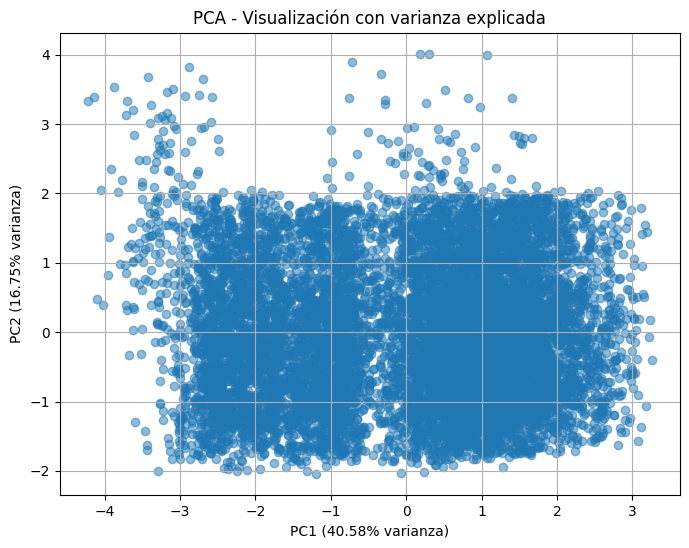

Varianza explicada por componente:
PC1: 0.4058 (40.58%)
PC2: 0.1675 (16.75%)
Varianza total explicada: 0.5734


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Variables seleccionadas ya estandarizadas
columnas_pca = [
    'Edad',
    'Family_Size',
    'Ingresos_anuales_brutos',
    'Digital_encuesta',
    'Dias_cliente',
    'Experiencia_laboral'
 
   
]

X = df_pca[columnas_pca]

# 2. PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. Gráfico PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza)')
plt.title('PCA - Visualización con varianza explicada')
plt.grid(True)
plt.show()
no
# 4. Mostrar varianza explicada numéricamente
print("Varianza explicada por componente:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f} ({var:.2%})")
print(f"Varianza total explicada: {pca.explained_variance_ratio_.sum():.4f}")